In [1]:
# Used in skewed distributed data only.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


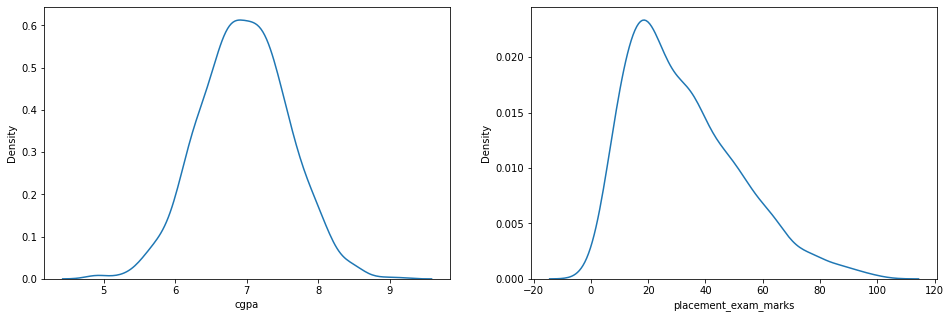

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'])

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'])

plt.show()

In [6]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot:xlabel='placement_exam_marks'>

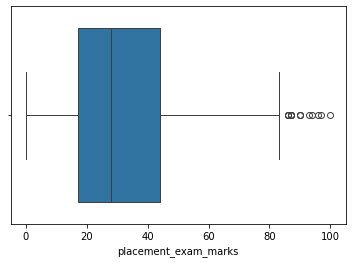

In [7]:
sns.boxplot(x=df['placement_exam_marks'])

In [8]:
# finding Q1 and Q3
Q1 = df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)

In [9]:
Q3

44.0

In [10]:
Q1

17.0

In [11]:
# finding IQR
iqr = Q3 - Q1
iqr

27.0

In [12]:
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

In [13]:
print('Upper limit',upper_limit)
print('Lower limit',lower_limit)

Upper limit 84.5
Lower limit -23.5


## Finding Outliers

In [14]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [15]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


## Trimming

In [16]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [17]:
new_df.shape

(985, 3)

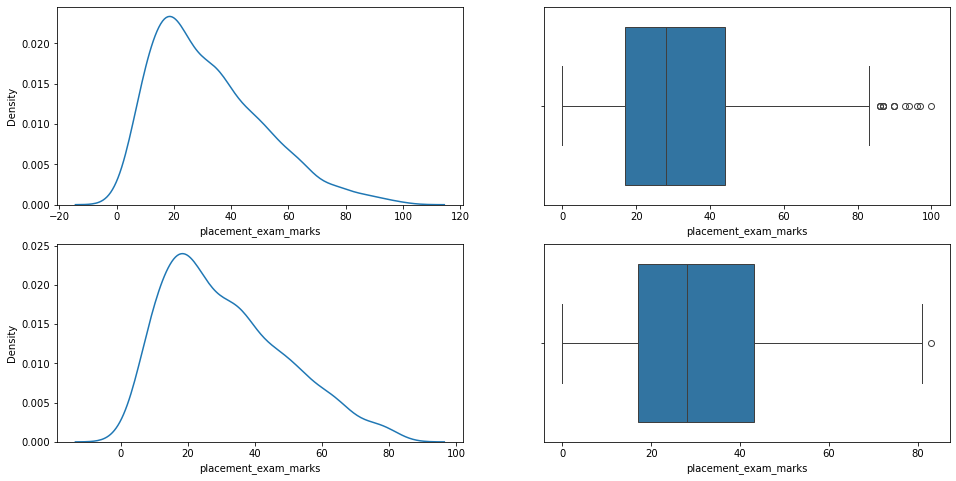

In [18]:
# comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])
plt.subplot(2,2,3)
sns.kdeplot(new_df['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(x=new_df['placement_exam_marks'])
plt.show()

## Capping

In [19]:
data = df.copy()
data['placement_exam_marks'] = np.where(
    data['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        data['placement_exam_marks'] < lower_limit,
        lower_limit,
        data['placement_exam_marks']
    )
)

In [20]:
data.shape

(1000, 3)

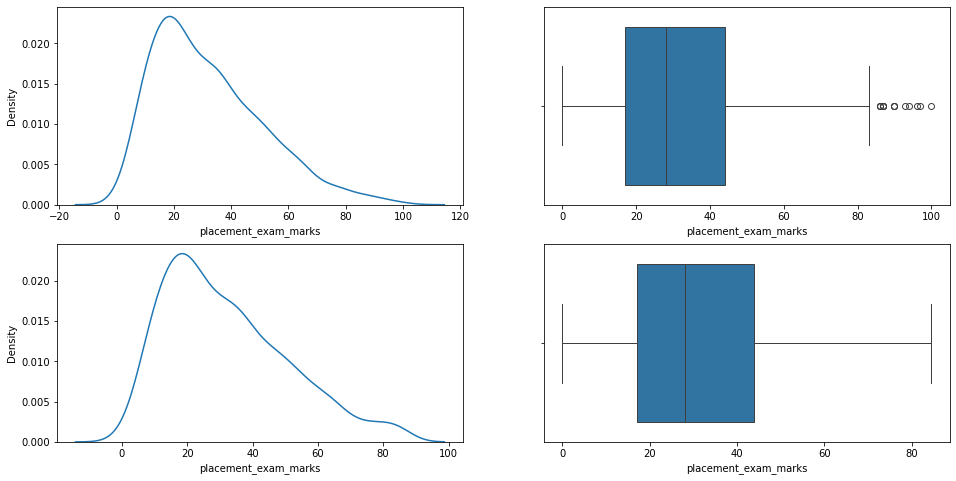

In [21]:
# comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.kdeplot(data['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(x=data['placement_exam_marks'])

plt.show()